In [1]:
import pandas as pd 
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [76]:
df = pd.read_csv('owid_mobility_europe_data_2.csv')

In [ ]:
def transport_corr(df, country_name, variable):
    transport = ["driving", "transit"] #  "walking",
    max_lag = 30
    for mode in transport:
        lag_corr = []
        lag = []
        for k in range(-max_lag,max_lag+1):
            lag_df = df.shift(k)
            lag_corr.append(df[variable].corr(lag_df[mode]))
            lag.append(k)
        plt.figure()
        plt.plot(lag, lag_corr)    
        plt.xlim(-max_lag,max_lag)
        plt.ylim(-1,1)
        plt.ylabel("Correlation")
        plt.xlabel("Lag")
        plt.plot(lag, np.ones(len(lag))*0.8, "--", color="k")
        plt.plot(lag, -0.8*np.ones(len(lag)), "--", color="k")
        plt.title("{}: {}/{} Lag".format(country_name, variable, mode))

In [49]:
def plot_graphs(country):
    country_df = df[df["location"] == country]
    country_df = country_df.drop("location", axis =1)
    country_df = country_df.set_index("date")

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()

    sns.lineplot(x="date", y="positive_rate", data=country_df, ax=ax2, alpha=.5)
    sns.lineplot(x="date", y="driving", data=country_df, ax=ax1)
    ax1.set(xlabel='Date', ylabel='Driving Mobility') 
    ax2.set( ylabel='Positive Rate') 
    plt.setp(ax1.get_xticklabels(), rotation=45)
    fig.tight_layout()

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    sns.lineplot(x="date", y="new_deaths_per_million", data=country_df, ax=ax2, alpha=.5)
    sns.lineplot(x="date", y="driving", data=country_df, ax=ax1)
    ax1.set(xlabel='Date', ylabel='Driving Mobility') 
    ax2.set( ylabel='Deaths per Million') 
    plt.setp(ax1.get_xticklabels(), rotation=45)
    fig.tight_layout()

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    sns.lineplot(x="date", y="stringency_index", data=country_df, ax=ax2, alpha=.5)
    sns.lineplot(x="date", y="driving", data=country_df, ax=ax1)
    ax1.set(xlabel='Date', ylabel='Driving Mobility') 
    ax2.set( ylabel='Stringency Index') 
    plt.setp(ax1.get_xticklabels(), rotation=45)
    fig.tight_layout()
    
    transport_corr(country_df, country, "positive_rate")
    transport_corr(country_df, country, "stringency_index")
    transport_corr(country_df, country, "new_deaths_per_million")
    

In [ ]:
## CLUSTER 2 COUNTRY ANALYSIS -
## this cluster mostly changed their behaviour earlier than 
## the increase in positive rate, stringency and deaths
## this suggests people were able to change their behaviours 
## before government intervention

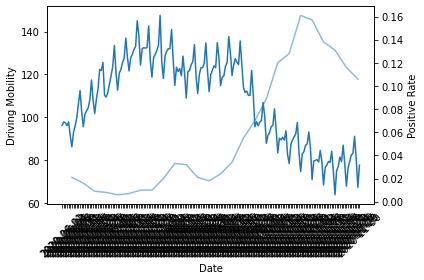

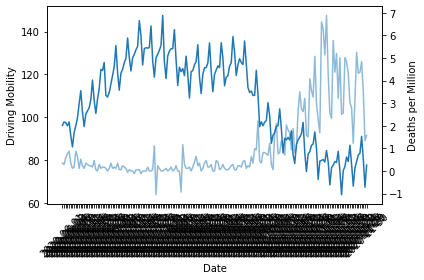

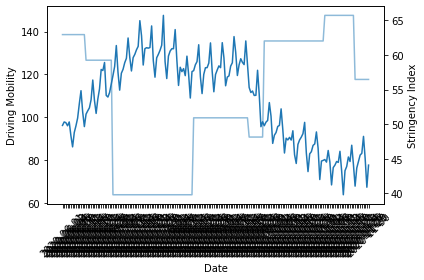

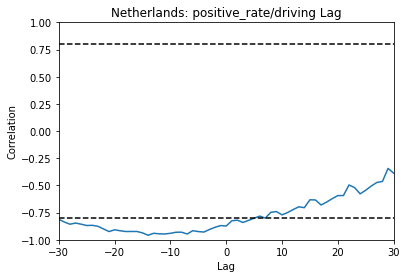

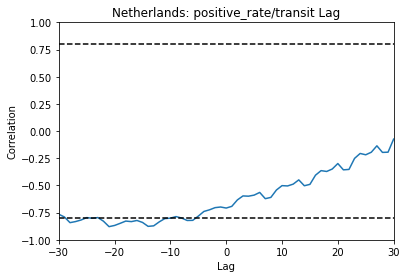

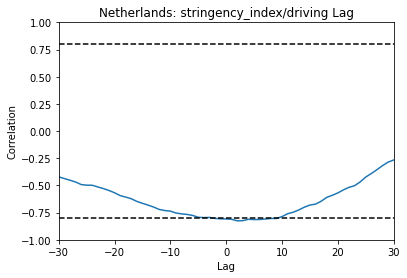

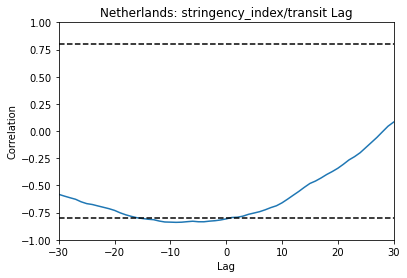

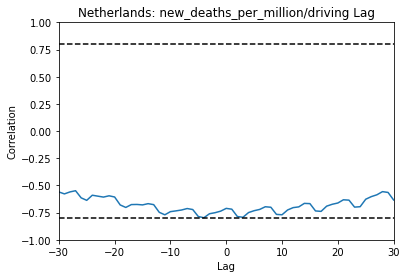

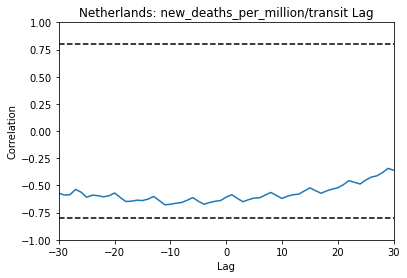

In [55]:
## NETHERLANDS
plot_graphs("Netherlands")

## seems like people actually respond to increase in positive rate
## people are able to reduce their driving levels before the positive rate increases
## reduction in driving correlated to stringency

## similar story for most of the countries in this cluster.
## negative lagged correlations show that people's behaviour changed before
## the increase in positive rate, stringency and deaths

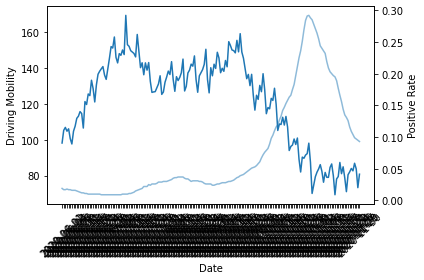

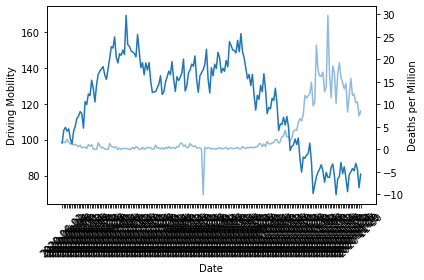

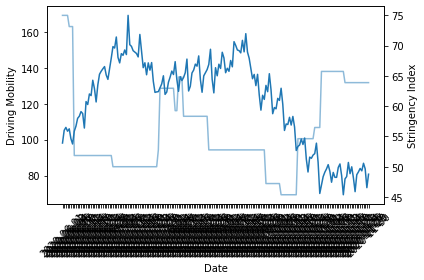

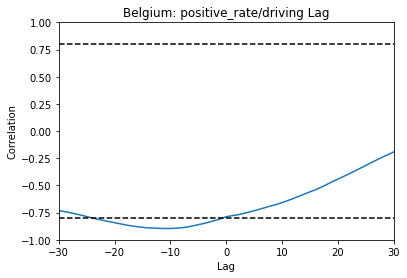

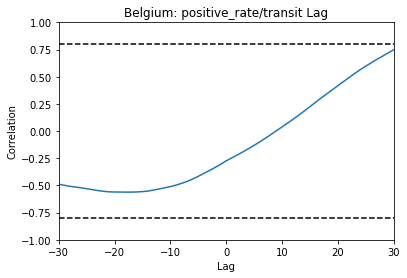

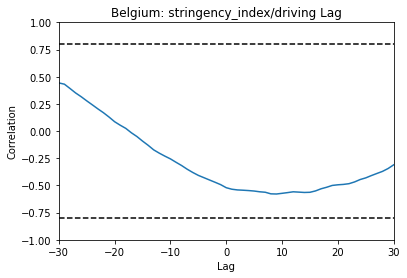

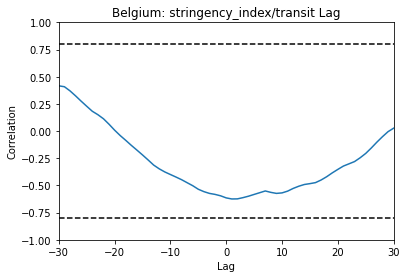

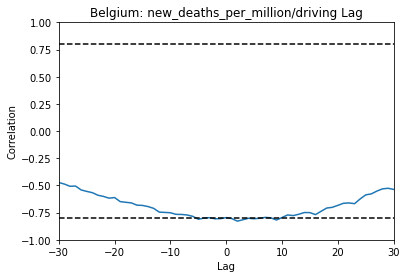

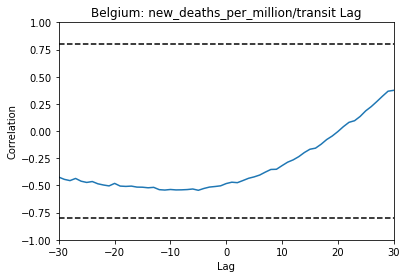

In [54]:
## BELGIUM
plot_graphs("Belgium")

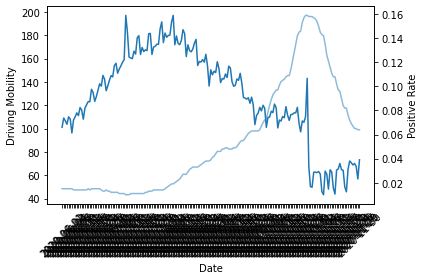

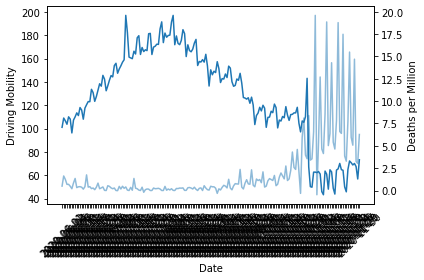

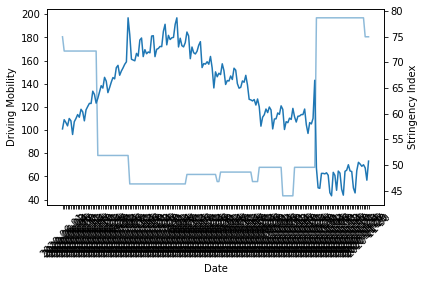

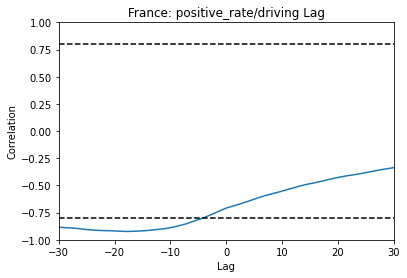

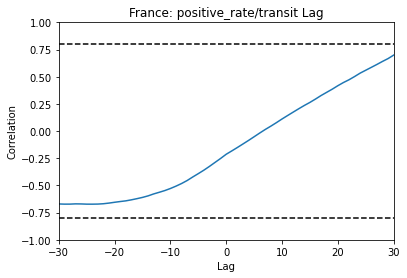

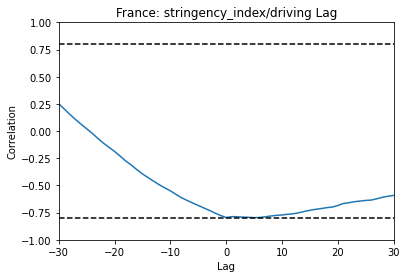

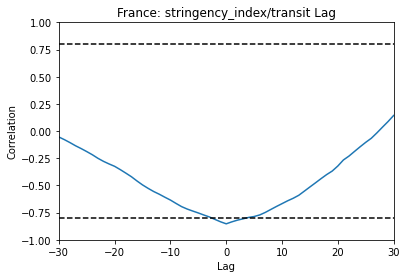

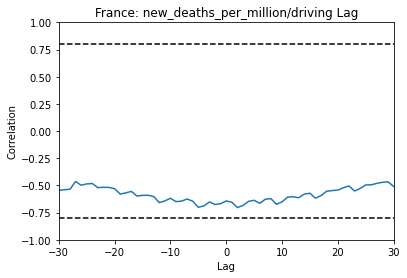

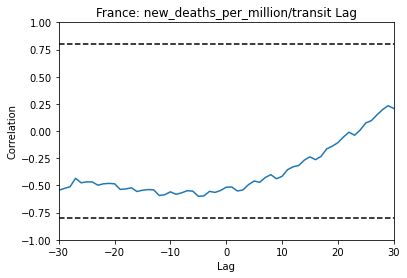

In [53]:
## FRANCE
plot_graphs("France")

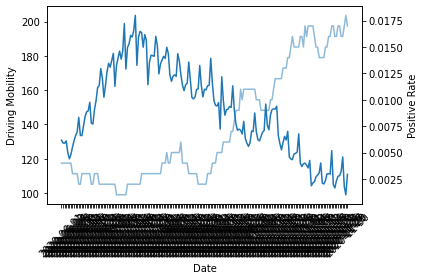

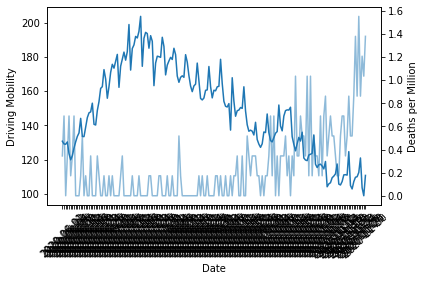

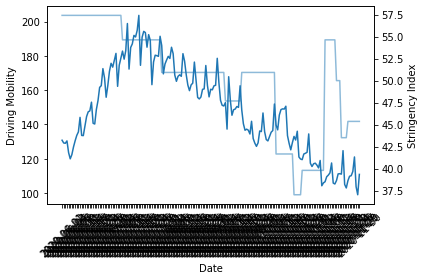

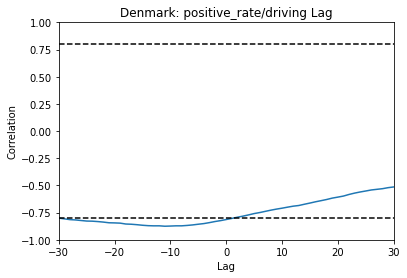

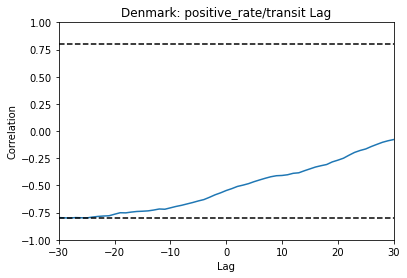

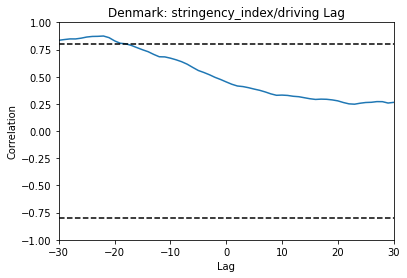

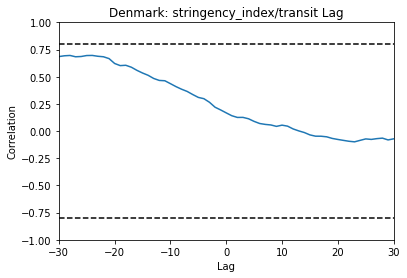

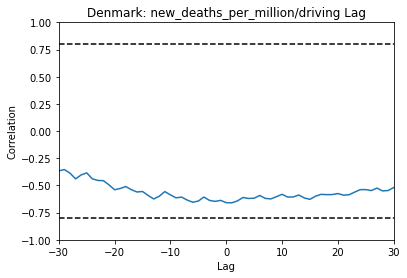

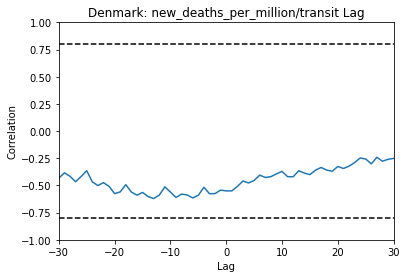

In [50]:
## DENMARK
plot_graphs("Denmark")

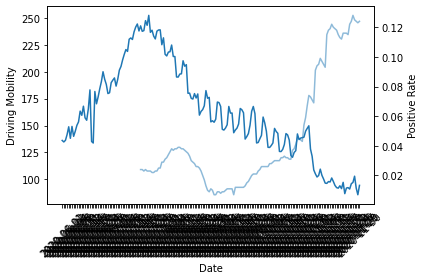

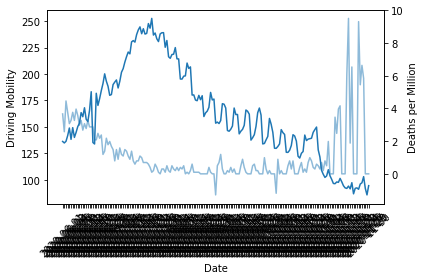

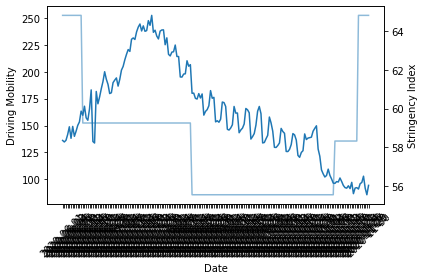

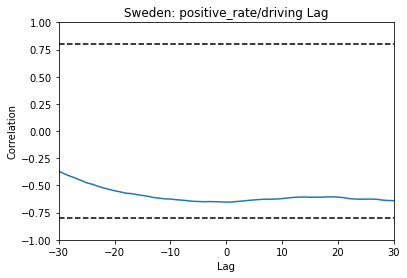

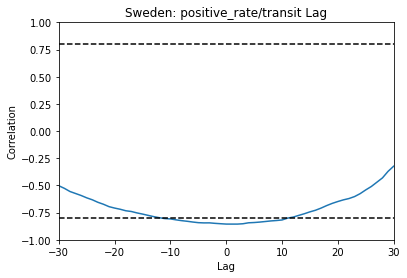

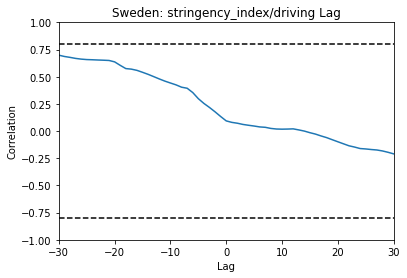

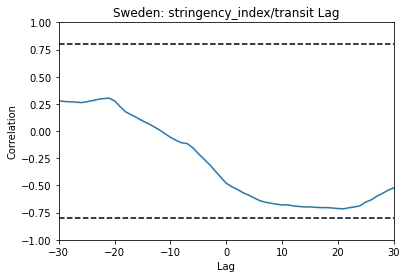

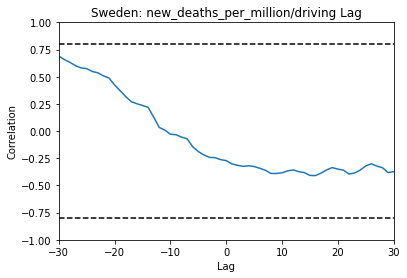

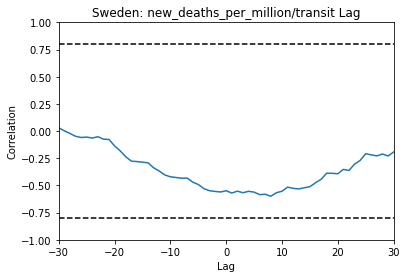

In [51]:
## SWEDEN
plot_graphs("Sweden")

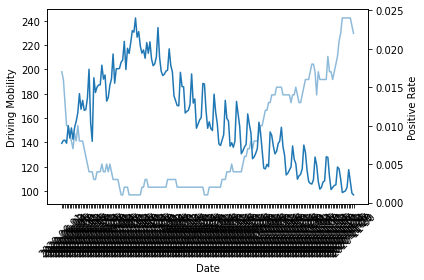

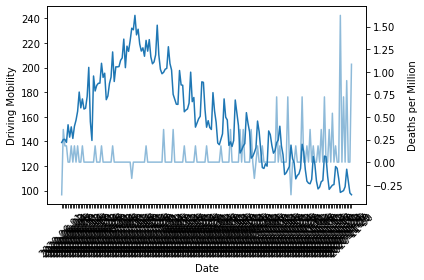

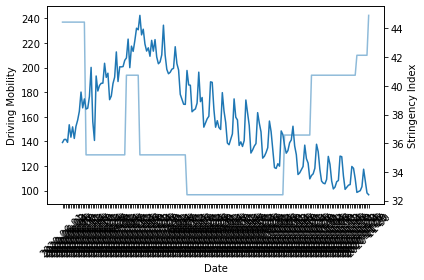

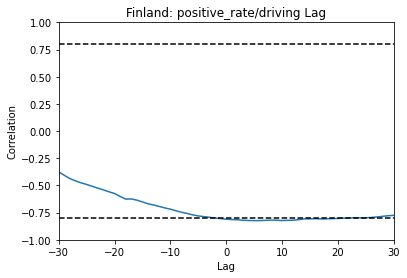

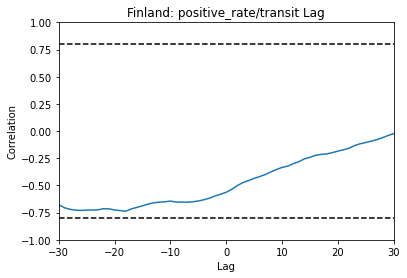

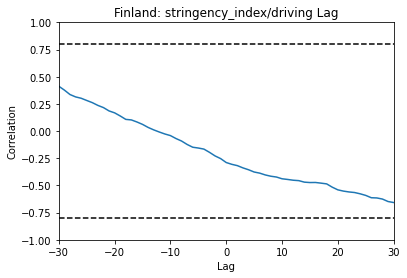

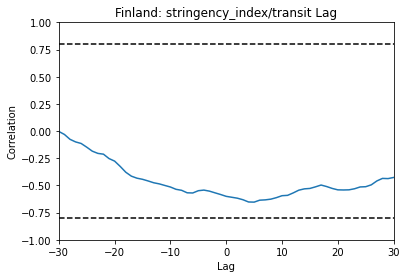

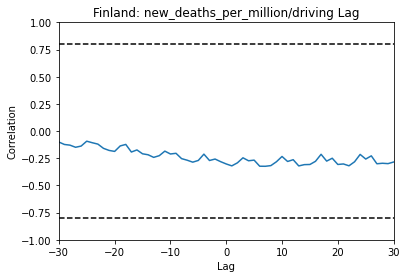

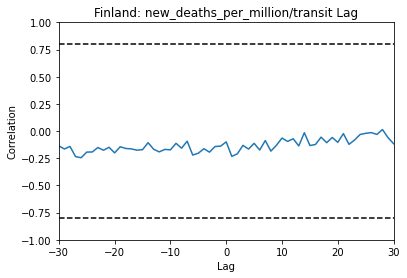

In [52]:
## FINLAND
plot_graphs("Finland")

In [ ]:
## CLUSTER 4 COUNTRY ANALYSIS - this cluster has less obvious conclusions from the correlations

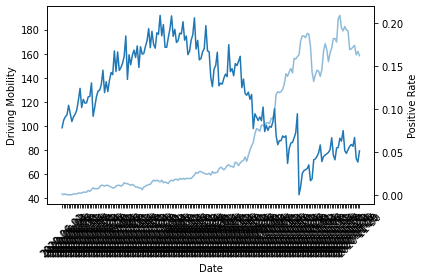

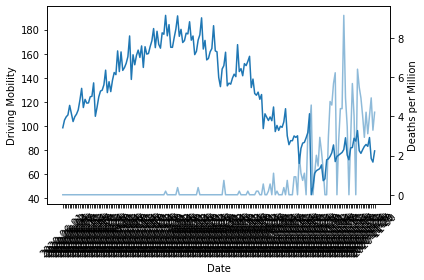

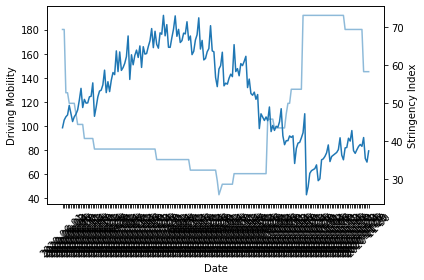

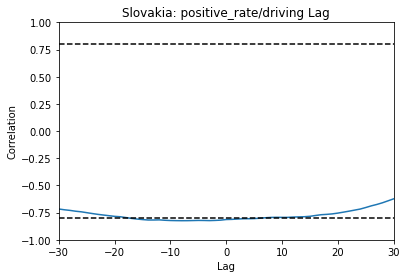

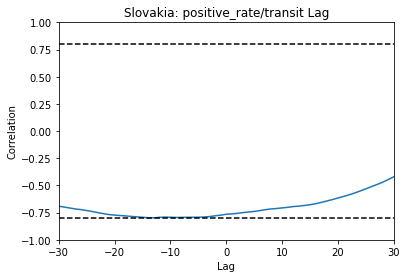

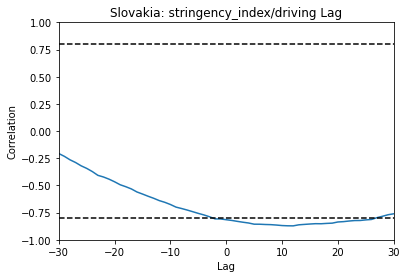

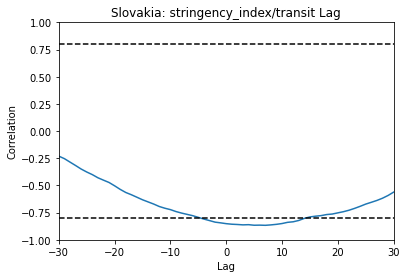

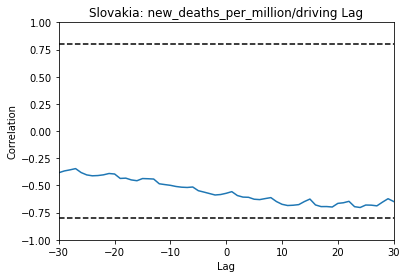

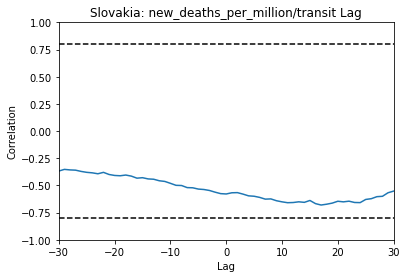

In [56]:
plot_graphs("Slovakia")
## early response to transit/driving from positive rate
## delayed reaction to driving and transit from increased stringency

In [64]:
#plot_graphs("Poland") # ## no clear results
## possibly more delayed response to driving from positive rate/stringency

In [63]:
#plot_graphs("Hungary")
### less obvious conclusions`

In [62]:
##plot_graphs("Czechia") ## no mobility data

In [61]:
#plot_graphs("Romania") ## no clear results

In [ ]:
## CLUSTER 3 COUNTRY ANALYSIS - 

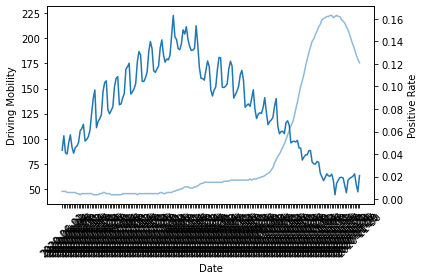

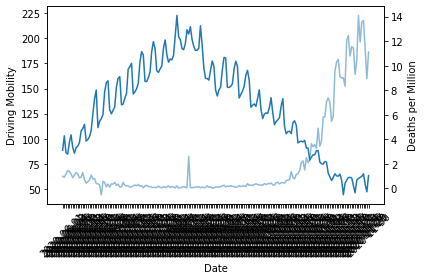

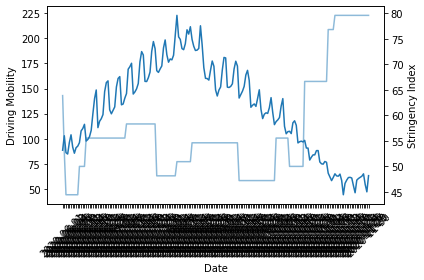

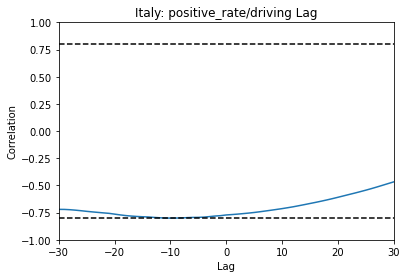

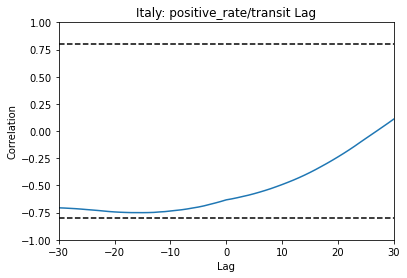

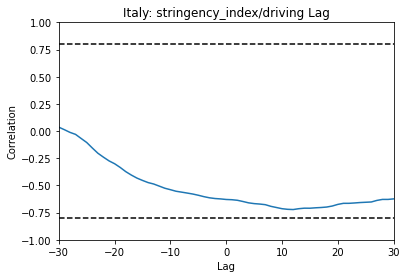

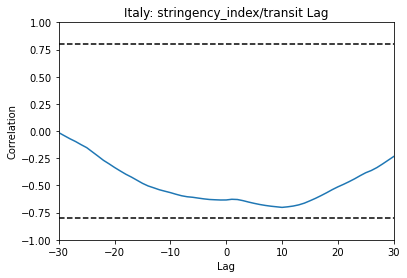

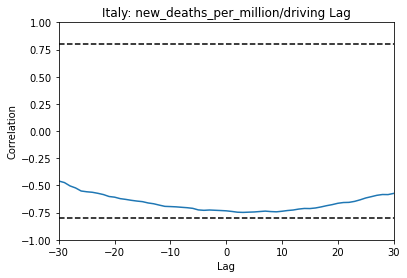

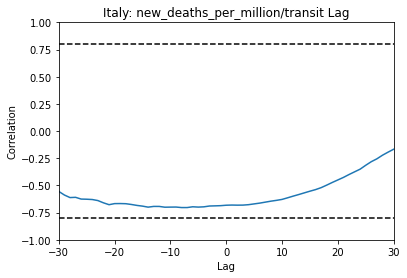

In [65]:
plot_graphs("Italy")
## were early to respond to increase in positivity
## were late to respond to stringency
## no clear death link

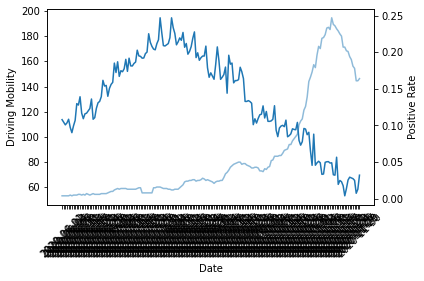

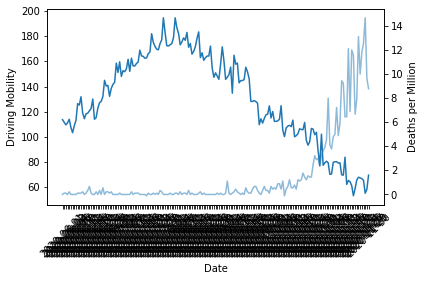

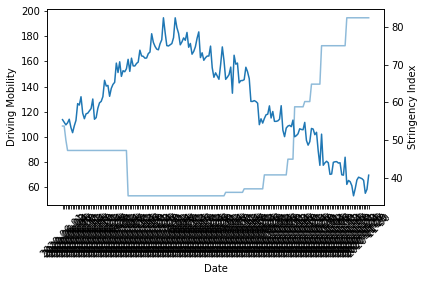

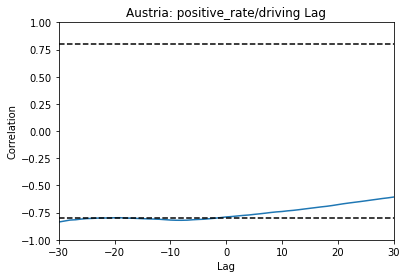

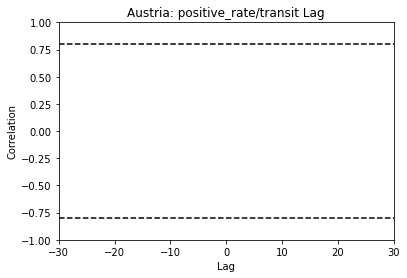

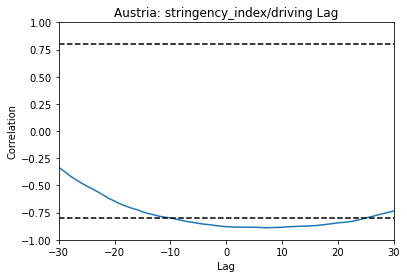

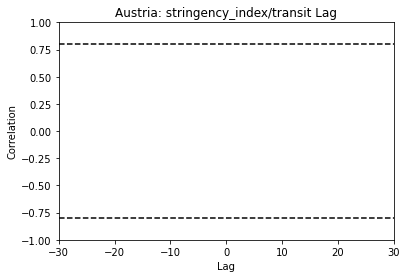

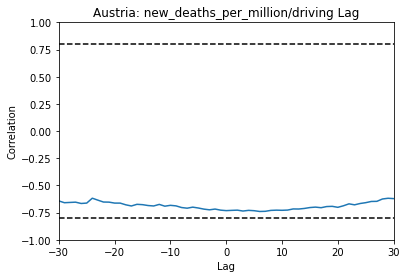

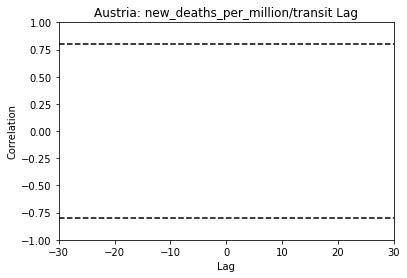

In [66]:
plot_graphs("Austria")
## sort of early to positive late to stringency

In [72]:
#plot_graphs("Slovenia")
## no clear results

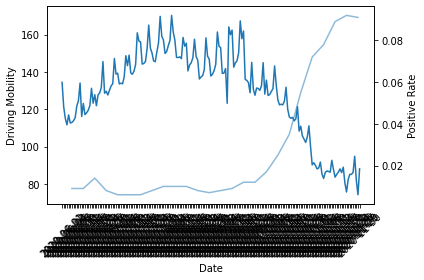

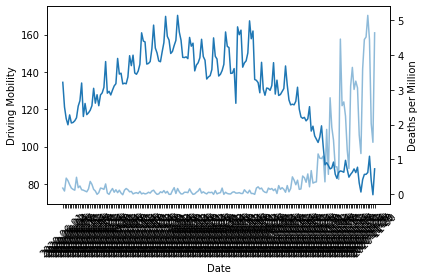

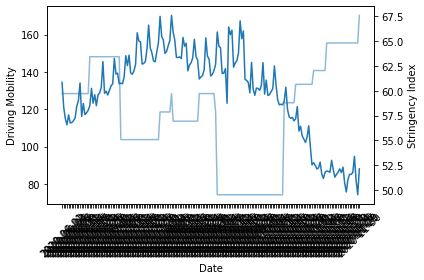

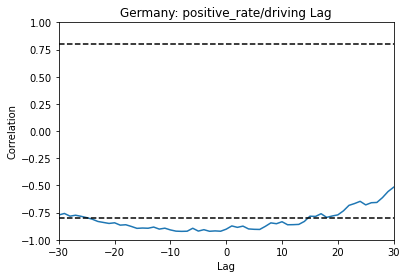

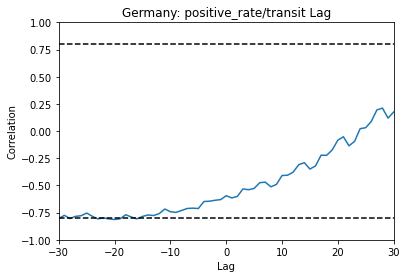

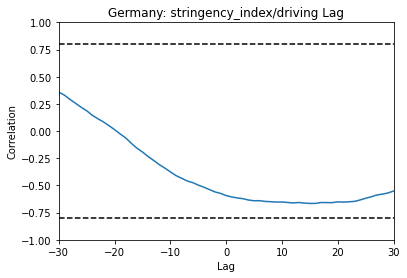

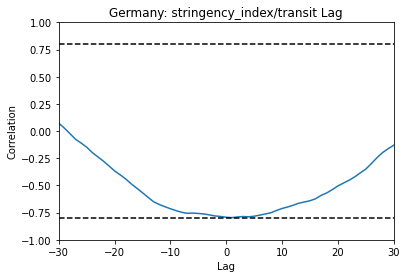

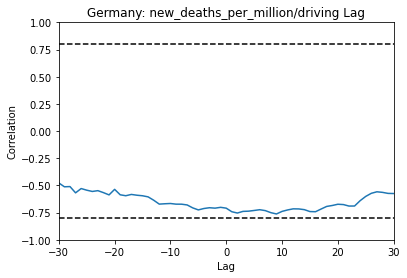

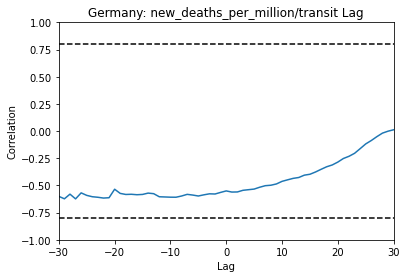

In [68]:
plot_graphs("Germany")
## early to positive rate
## on time / a bit late to stringency changes

In [71]:
#plot_graphs("Greece")
## no clear results

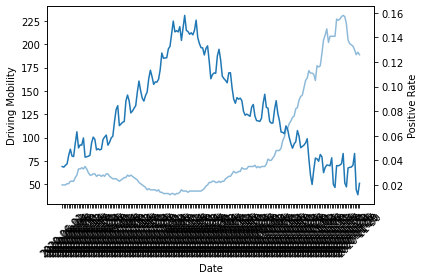

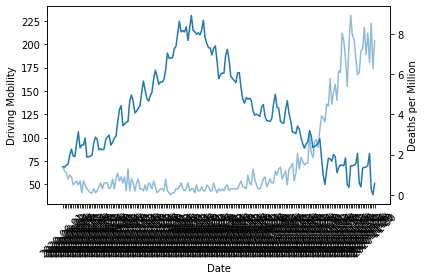

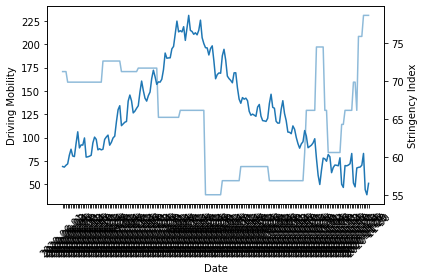

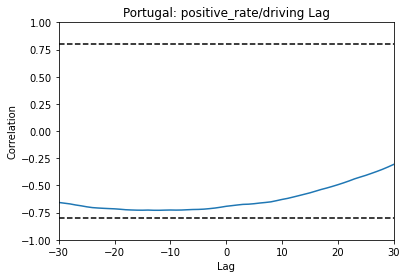

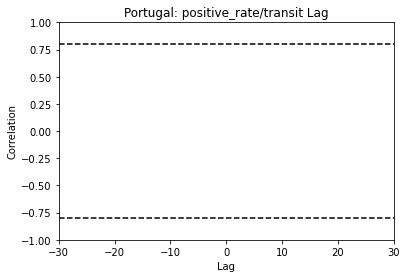

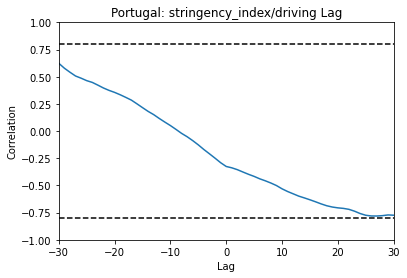

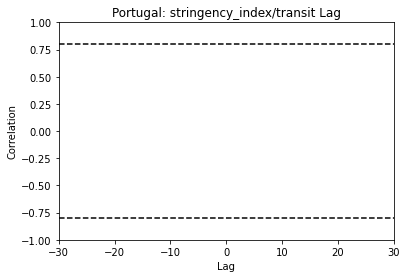

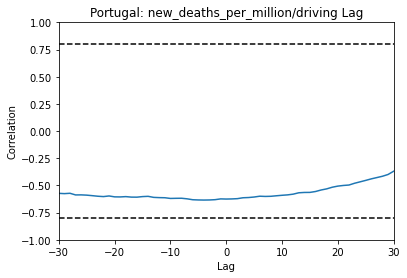

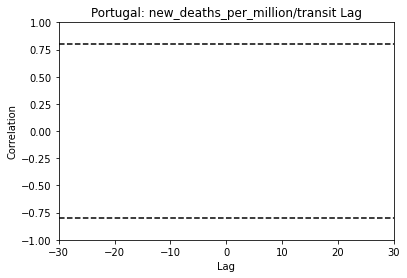

In [70]:
#plot_graphs("Portugal")
## no clear results

In [74]:
#plot_graphs("Latvia") 
## no clear results

In [78]:
#plot_graphs("Spain")
## no clear results

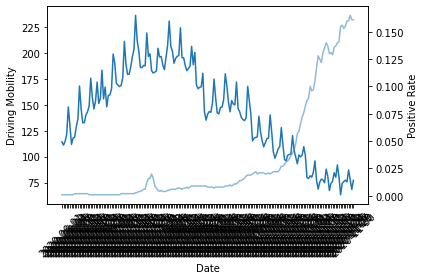

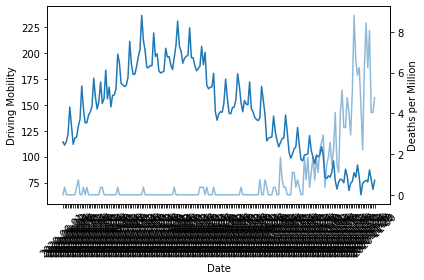

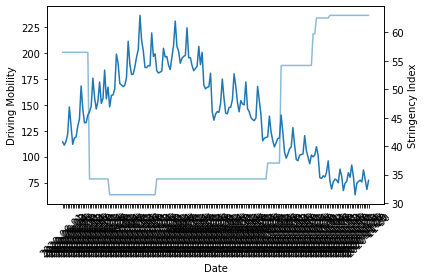

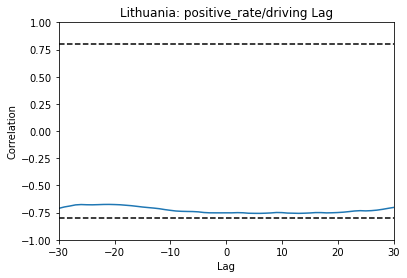

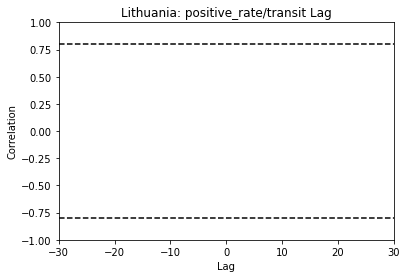

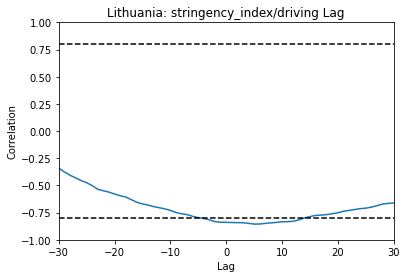

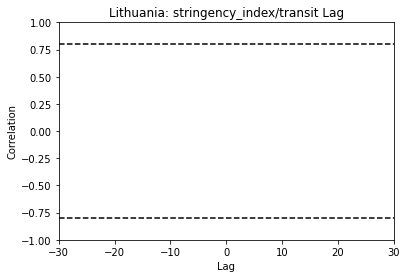

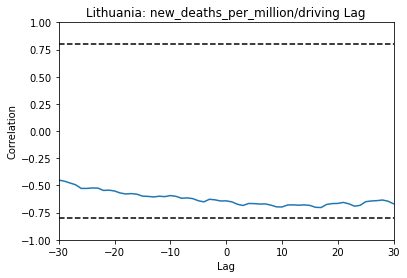

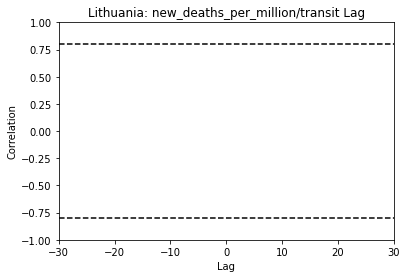

In [81]:
plot_graphs("Lithuania")
## lagged response to stringency

In [80]:
#plot_graphs("Croatia") ## no clear results

In [ ]:
## Europe Average

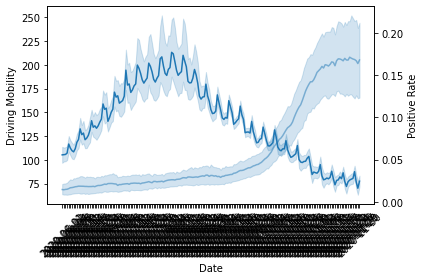

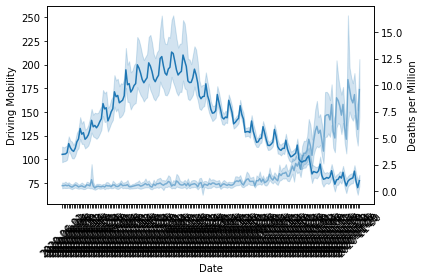

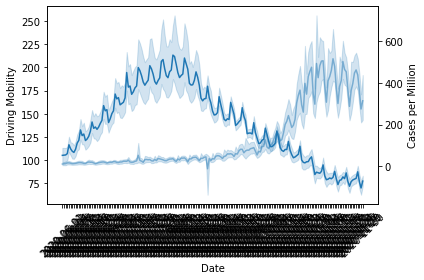

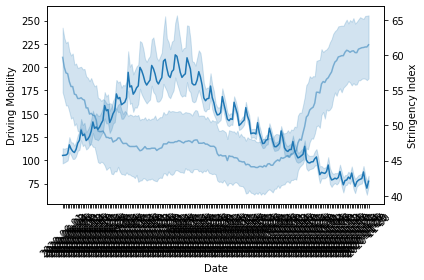

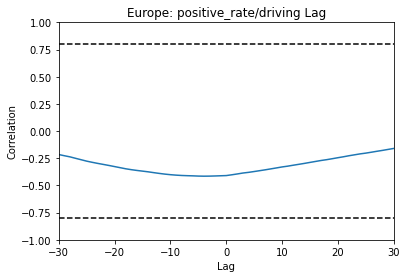

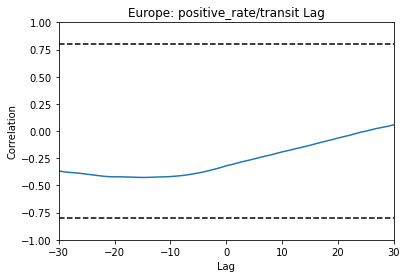

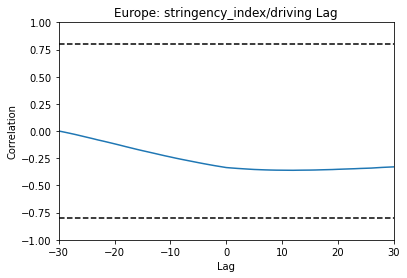

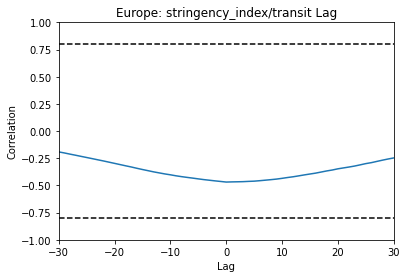

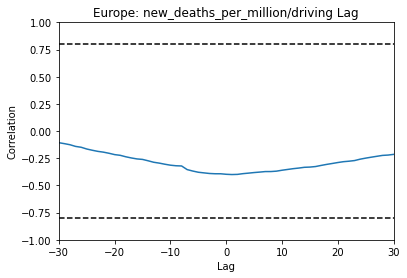

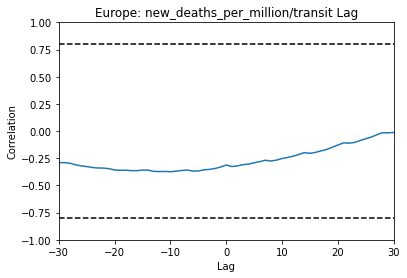

In [85]:
country_df = df
country = "Europe"

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(x="date", y="positive_rate", data=country_df, ax=ax2, alpha=.5)
sns.lineplot(x="date", y="driving", data=country_df, ax=ax1)
ax1.set(xlabel='Date', ylabel='Driving Mobility') 
ax2.set( ylabel='Positive Rate') 
plt.setp(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(x="date", y="new_deaths_per_million", data=country_df, ax=ax2, alpha=.5)
sns.lineplot(x="date", y="driving", data=country_df, ax=ax1)
ax1.set(xlabel='Date', ylabel='Driving Mobility') 
ax2.set( ylabel='Deaths per Million') 
plt.setp(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(x="date", y="new_cases_per_million", data=country_df, ax=ax2, alpha=.5)
sns.lineplot(x="date", y="driving", data=country_df, ax=ax1)
ax1.set(xlabel='Date', ylabel='Driving Mobility') 
ax2.set( ylabel='Cases per Million') 
plt.setp(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(x="date", y="stringency_index", data=country_df, ax=ax2, alpha=.5)
sns.lineplot(x="date", y="driving", data=country_df, ax=ax1)
ax1.set(xlabel='Date', ylabel='Driving Mobility') 
ax2.set( ylabel='Stringency Index') 
plt.setp(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()

transport_corr(country_df, country, "positive_rate")
transport_corr(country_df, country, "stringency_index")
transport_corr(country_df, country, "new_deaths_per_million")